In [4]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import sys 
sys.path.append("../../core-scripts")
from ShearSpectrum2D import spectrum
from cheb import cheb
chebfit = np.polynomial.chebyshev.Chebyshev.fit

In [26]:
def plot_modes(idx, evecs, M=50):
    _,ygl = cheb(M)
    Psi = evecs[0:M, idx]
    Qxx = evecs[M:2*M, idx]
    Qxy = evecs[2*M:3*M, idx]
    
    fig, axs = plt.subplots(3,1)
    axs[0].plot(ygl, Psi.real)
    axs[0].plot(ygl, Psi.imag)
    axs[0].title.set_text("$\Psi$")
    axs[0].legend(["Real","Imag"])
    
    axs[1].plot(ygl, Qxx.real)
    axs[1].plot(ygl, Qxx.imag)
    axs[1].title.set_text("$Q_{xx}$")
    
    axs[2].plot(ygl, Qxy.real)
    axs[2].plot(ygl, Qxy.imag)
    axs[2].title.set_text("$Q_{xy}$")
    
    for ax in axs.flat:
        ax.set(xlabel='$y$')

    # Hide x labels and tick labels for top plots and y ticks for right plots.
    for ax in axs.flat:
        ax.label_outer()
    
    return fig

In [45]:
k,gd,tau,a = 0.5, 0.5, 1, 0.5
M=100
evals, evecs = spectrum(k,gd,tau,a, M=M) # M=50 by default!

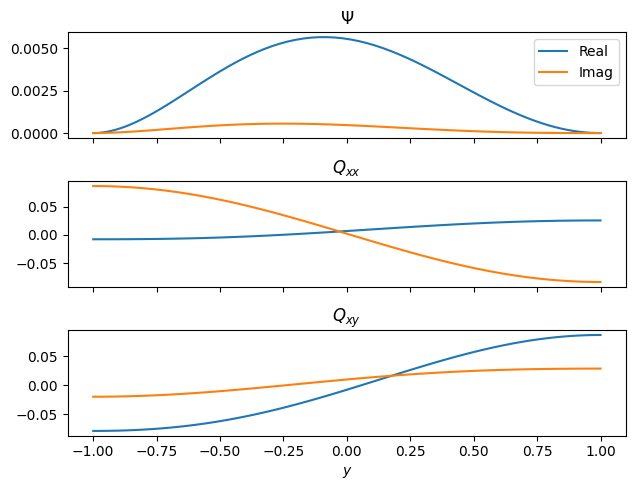

In [51]:
sort_idx = np.argsort(-np.real(evals))
evals = evals[sort_idx]
evecs = evecs[:, sort_idx]
mode = 3
fig = plot_modes(mode, evecs, M=M)
fig.set_figheight(5)
plt.tight_layout()